## Esercizio 1/2 Andiamo su http://www.datiopen.it/it/opendata/Mappa_dei_pub_circoli_locali_in_Italia e scarichiamo il file (in formato CSV) della mappa dei pub, circoli e locali in Italia Nota: il dataset non ha un encoding UTF-8 ma Latin1; inoltre il separatore non è una virgola, ma un punto e virgola. Dunque per leggerlo dovremo aggiungere i parametri encoding= e sep=, ad esempio: pd.read_csv(file_path, encoding="latin1", sep=";") 2 dove file_path è la posizione del file nel nostro calcolatore

In [1]:
#importo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importo il df
url = "/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/altri_dataset/Mappa-dei-pub-circoli-locali-in-Italia.csv"

df_pub = pd.read_csv(url, encoding="latin1", sep=";")
df_pub.head()

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,ALA DI STURA,CITTA' METROPOLITANA DI TORINO,Piemonte,NaN,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150


## Esercizio 2/2 Esaminiamo il dataset: • quanti dati ci sono in totale? • quali sono i metadati? • stampiamo il primo elemento • stampiamo l'ultimo elemento • riusciamo a stampare un elemento a caso? • quali sono gli anni di inserimento presenti? • quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46? • quante attività ci sono nella provincia di Vicenza? • quante enoteche ci sono, e come si chiamano? 3 • quante attività ci sono in Lazio e Abruzzo assieme?

In [2]:
#metadati
df_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Comune                           2635 non-null   object 
 1   Provincia                        2635 non-null   object 
 2   Regione                          2635 non-null   object 
 3   Nome                             2337 non-null   object 
 4   Anno inserimento                 2635 non-null   int64  
 5   Data e ora inserimento           2635 non-null   object 
 6   Identificatore in OpenStreetMap  2635 non-null   int64  
 7   Longitudine                      2635 non-null   float64
 8   Latitudine                       2635 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 185.4+ KB


In [3]:
#primo elemento
df_pub.head(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [4]:
#ultimo elemento
df_pub.tail(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2634,TRANI,BARLETTA-ANDRIA-TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [5]:
#elemento casuale
df_pub.sample(1)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
951,VALEGGIO SUL MINCIO,VERONA,Veneto,Bar Scaligero,2013,2013-05-04T20:42:58Z,2291850896,10.734233,45.351866


In [6]:
#anni inserimento presenti
print(df_pub["Anno inserimento"].unique())

[2011 2015 2010 2012 2014 2016 2013 2008 2009 2007]


In [7]:
#attività nel quadrato di longitudine 9-10 e latitudine 45-46
df_pub.loc[(df_pub["Latitudine"].between(45, 46)) & (df_pub["Longitudine"].between(9, 10))]

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
342,ORIGGIO,VARESE,Lombardia,NaN,2010,2010-03-04T10:01:20Z,660121664,9.014469,45.585286
343,ORIGGIO,VARESE,Lombardia,Buenavista,2012,2012-10-29T14:18:54Z,1654210859,9.021546,45.608240
346,SARONNO,VARESE,Lombardia,NaN,2012,2012-09-09T16:32:21Z,1907124869,9.031357,45.629008
347,SARONNO,VARESE,Lombardia,Bray Hill,2014,2014-11-25T17:32:40Z,1907140529,9.030316,45.628685
...,...,...,...,...,...,...,...,...,...
2607,SEREGNO,MONZA-BRIANZA,Lombardia,Pane e trita,2015,2015-04-11T13:16:22Z,3450504976,9.216413,45.650058
2608,SEREGNO,MONZA-BRIANZA,Lombardia,The Quiet Man,2014,2014-08-29T07:53:44Z,3048521612,9.210487,45.648891
2609,VEDANO AL LAMBRO,MONZA-BRIANZA,Lombardia,Bambu Pizza Pub,2014,2014-10-11T18:04:39Z,3124304239,9.272623,45.614027
2610,VERANO BRIANZA,MONZA-BRIANZA,Lombardia,NaN,2010,2010-01-30T10:13:31Z,622994942,9.227324,45.681202


In [8]:
#attività nella provincia di Vicenza
df_pub.groupby("Provincia").get_group("VICENZA")

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
969,ASIAGO,VICENZA,Veneto,Ghel Pab,2015,2015-08-10T16:56:06Z,3689864850,11.510021,45.872548
970,ASIAGO,VICENZA,Veneto,Maddarello 2.0,2015,2015-08-11T18:37:19Z,3692023938,11.515876,45.898111
971,ASIAGO,VICENZA,Veneto,Vecchio Mulino,2015,2015-07-22T19:05:06Z,3662135148,11.508650,45.873810
972,BASSANO DEL GRAPPA,VICENZA,Veneto,Al Porton,2011,2011-09-13T17:26:02Z,1402624430,11.732132,45.767777
973,BASSANO DEL GRAPPA,VICENZA,Veneto,Bar San Marco,2011,2011-10-12T09:43:56Z,1463795447,11.745629,45.765352
...,...,...,...,...,...,...,...,...,...
1037,VICENZA,VICENZA,Veneto,Bar Carioca,2011,2011-02-06T01:57:15Z,612198399,11.542473,45.554192
1038,VICENZA,VICENZA,Veneto,Irish pub,2014,2014-04-08T21:12:13Z,2778358041,11.566676,45.564782
1039,VICENZA,VICENZA,Veneto,Miles Davis Pub,2009,2009-06-10T15:37:50Z,418297776,11.549959,45.591108
1040,VICENZA,VICENZA,Veneto,Night Club Boys,2013,2013-02-26T17:26:30Z,1423267887,11.506844,45.530566


In [9]:
#conteggio e nomi delle enoteche
enoteche = df_pub[df_pub['Nome'].str.contains('enoteca', case=False, na=False)]
enoteche

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
64,TORINO,CITTA' METROPOLITANA DI TORINO,Piemonte,"Enoteca con Cucina""""Tirolin""""",2012,2012-01-24T14:30:04Z,1603586163,7.713993,45.065174
496,MILANO,CITTA' METROPOLITANA DI MILANO,Lombardia,Concordia Enoteca,2014,2014-04-01T11:15:38Z,2758108717,9.171033,45.450819
1003,MALO,VICENZA,Veneto,Enoteca Umberto,2013,2013-04-15T08:41:22Z,1659350138,11.418507,45.653453
1491,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"Al Brindisi""""",2015,2015-03-31T17:33:38Z,1249699754,11.620326,44.835890
1492,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"da Massimo""""",2015,2015-03-31T17:33:38Z,1249701207,11.619559,44.834824
1723,CASCIANA TERME LARI,PISA,Toscana,Enoteca Il Violino Rosso,2015,2015-08-20T13:12:56Z,3706561154,10.591535,43.566210


In [10]:
#attività presenti in Lazio e Abruzzo
df_pub[df_pub["Regione"].isin(['Lazio', 'Abruzzo'])]["Nome"]

,Nome
1801,Franco Marlo
1802,NaN
1803,NaN
1804,fidA
1805,La Piazzetta
...,...
2199,Siren's Corner
2200,Stozza'n'Beer
2201,The Underground Pub
2202,Red Lion Pub


### Il dataset insurance.csv dei beginner_datasets contiene dati su caratteristiche e abitudini delle persone rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute. • Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna; • Quali sono le medie di charges rispetto a region? Ci sono differenze significative• E rispetto a smoker? E a sex? • Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi? Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il metodo .groupby()



In [11]:
#Importo il dataset Insurance.csv
url = "/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/insurance.csv"
df_insurance = pd.read_csv(url)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Esploro i metadati
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df_insurance.groupby("region")["charges"].mean() # la differenza non sembra significativa ma sarebbe opportuno utilizzare un test di ipotesi come l'ANOVA

charges_by_region = df_insurance[["region","charges"]]
charges_by_region
southwest_charges = charges_by_region.loc[charges_by_region["region"] == "southwest", ["charges"]]
southwest_charges = southwest_charges.rename(columns={"charges": "southwest_charges"})
southwest_charges
southeast_charges = charges_by_region.loc[charges_by_region["region"] == "southeast", ["charges"]]
southeast_charges = southeast_charges.rename(columns={"charges": "southeast_charges"})
southeast_charges
northwest_charges = charges_by_region.loc[charges_by_region["region"] == "northwest", ["charges"]]
northwest_charges = northwest_charges.rename(columns={"charges": "northwest_charges"})
northwest_charges
northeast_charges = charges_by_region.loc[charges_by_region["region"] == "northeast", ["charges"]]
northeast_charges = northeast_charges.rename(columns={"charges": "northeast_charges"})
northeast_charges

,northeast_charges
8,6406.41070
10,2721.32080
16,10797.33620
17,2395.17155
20,13228.84695
...,...
1321,28101.33305
1325,13143.33665
1326,7050.02130
1328,22395.74424


In [14]:
charges_by_region.groupby("region")["charges"].mean() #la differenza non sembra significativa ma sarebbe opportuno utilizzare un test di ipotesi come l'ANOVA

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [15]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(southeast_charges, southwest_charges, northeast_charges, northwest_charges)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: [2.96962669]
P-value: [0.03089336]


In [16]:
import statsmodels.stats.multicomp as mc
import numpy as np

# Concatenate the charges from all regions into a single array
data = np.concatenate([southeast_charges["southeast_charges"].values,
                       southwest_charges["southwest_charges"].values,
                       northeast_charges["northeast_charges"].values,
                       northwest_charges["northwest_charges"].values])

# Create a list of group labels corresponding to each data point
groups = ['southeast'] * len(southeast_charges) + \
         ['southwest'] * len(southwest_charges) + \
         ['northeast'] * len(northeast_charges) + \
         ['northwest'] * len(northwest_charges)

# Perform the MultiComparison
comp = mc.MultiComparison(data, groups)
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


<Axes: xlabel='region', ylabel='charges'>

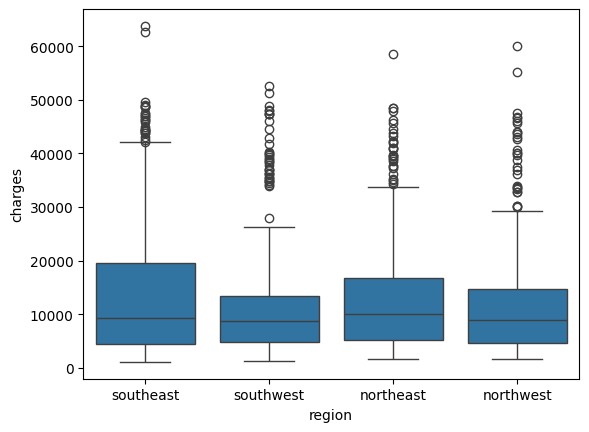

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(data, columns=["charges"])
data["region"] = groups

sns.boxplot(x="region", y="charges", data=data)

In [18]:
df_insurance.groupby("smoker")["charges"].mean() # qui la differenza appare significativa

,charges
smoker,
no,8434.268298
yes,32050.231832


In [19]:
df_insurance.groupby("sex")["charges"].mean() # qui la differenza non appare significativa

,charges
sex,
female,12569.578844
male,13956.751178


In [20]:
#minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi
charges_stats = df_insurance["charges"].describe()
bmi_stats = df_insurance["bmi"].describe()
charges_bmi_stats = pd.concat([charges_stats, bmi_stats], axis=1)
charges_bmi_stats.columns = ["charges_stats", "bmi_stats"]
charges_bmi_stats #il df risultante paragona i descrittori statistici di charges con quelli di bmi

,charges_stats,bmi_stats
count,1338.000000,1338.000000
mean,13270.422265,30.663397
std,12110.011237,6.098187
min,1121.873900,15.960000
25%,4740.287150,26.296250
50%,9382.033000,30.400000
75%,16639.912515,34.693750
max,63770.428010,53.130000


## Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e calcoliamo: • La media della lunghezza dei petali di tutto il dataset • La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby() • Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()

In [21]:
#  Carico il df
url = "/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/iris.csv"
df_iris = pd.read_csv(url)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#media della lunghezza dei petali
print(df_iris["petal_length"].mean())

3.758666666666666


In [23]:
#media della lunghezza dei petali per specie
df_iris.groupby("species")["petal_length"].mean()

,petal_length
species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [24]:
#media, minimo e massimo della larghezza dei sepali per ogni specie
df_iris.groupby("species")["sepal_width"].agg(["mean", "min", "max"])

,mean,min,max
species,,,
Iris-setosa,3.418,2.3,4.4
Iris-versicolor,2.770,2.0,3.4
Iris-virginica,2.974,2.2,3.8


##Nei beginner_datasets, il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini: • Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale? • C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi? • Rifacendo le analisi dei due punti precedenti ma per il pH, cambia qualcosa? • E per i solfati?

In [25]:
#carico il df
url = "/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/wine.csv"
df_wine = pd.read_csv(url)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
#media concentrazione alcolica per qualità
alcohol_per_quality = df_wine.groupby("quality")["alcohol"].mean()
alcohol_per_quality

,alcohol
quality,
3,10.215000
4,10.180093
5,9.837783
6,10.587553
7,11.386006
8,11.678756
9,12.180000


In [27]:
#confronto concentrazione alcolica per qualità con quella totale
alcohol_mean = df_wine['alcohol'].mean()
alcohol_mean_diff = alcohol_per_quality-alcohol_mean #sottraggo la concentrazione alcolica media totale con le medie per qualità
alcohol_mean_diff = alcohol_mean_diff.rename("alcohol_mean_diff") #rinomino la colonna
alcohol_mean_diff

,alcohol_mean_diff
quality,
3,-0.276801
4,-0.311708
5,-0.654018
6,0.095752
7,0.894205
8,1.186956
9,1.688199


In [28]:
#differenza concentrazione alcolica media vini bianchi/rossi
alcohol_type_mean = df_wine.groupby("type")["alcohol"].mean()
alcohol_type_mean = alcohol_type_mean.rename("alcohol_type_mean")
alcohol_type_mean

,alcohol_type_mean
type,
red,10.422983
white,10.514267


In [29]:
#media ph per qualità
ph_per_quality = df_wine.groupby("quality")["pH"].mean()
ph_per_quality

,pH
quality,
3,3.257667
4,3.231620
5,3.212189
6,3.217726
7,3.228072
8,3.223212
9,3.308000


In [30]:
#confronto ph per qualità con quella totale
ph_mean = df_wine['pH'].mean()
ph_mean_diff = ph_per_quality-ph_mean #sottraggo la concentrazione alcolica media totale con le medie per qualità
ph_mean_diff = ph_mean_diff.rename("ph_mean_diff") #rinomino la colonna
ph_mean_diff

,ph_mean_diff
quality,
3,0.039166
4,0.013120
5,-0.006312
6,-0.000775
7,0.009571
8,0.004712
9,0.089499


In [31]:
#differenza ph medio vini bianchi/rossi
ph_type_mean = df_wine.groupby("type")["pH"].mean()
ph_type_mean = ph_type_mean.rename("ph_type_mean")
ph_type_mean

,ph_type_mean
type,
red,3.311113
white,3.188267


In [32]:
#media solfiti per qualità
sulph_per_quality = df_wine.groupby("quality")["sulphates"].mean()
sulph_per_quality

,sulphates
quality,
3,0.506333
4,0.505648
5,0.526403
6,0.532549
7,0.547025
8,0.512487
9,0.466000


In [33]:
#confronto solfiti per qualità con quella totale
sulph_mean = df_wine['sulphates'].mean()
sulph_mean_diff = sulph_per_quality-sulph_mean #sottraggo la concentrazione alcolica media totale con le medie per qualità
sulph_mean_diff = sulph_mean_diff.rename("sulph_mean_diff") #rinomino la colonna
sulph_mean_diff

,sulph_mean_diff
quality,
3,-0.024935
4,-0.025620
5,-0.004865
6,0.001281
7,0.015757
8,-0.018781
9,-0.065268


In [34]:
#differenza media solfiti vini bianchi/rossi
sulph_type_mean = df_wine.groupby("type")["sulphates"].mean()
sulph_type_mean = sulph_type_mean.rename("sulph_type_mean")
sulph_type_mean

,sulph_type_mean
type,
red,0.658149
white,0.489847


In [35]:
#creo un df delle medie di alcool, ph, solfiti, suddivise per rivenditore tramite merge
mean_per_quality1 = pd.merge(left=alcohol_per_quality, right=ph_per_quality, on="quality") #merge1
mean_per_quality = pd.merge(left=mean_per_quality1, right=sulph_per_quality, on="quality") #merge2
mean_per_quality_diff1 = pd.merge(left=mean_per_quality, right=alcohol_mean_diff, on="quality")#merge1 diff da media tot
mean_per_quality_diff2 = pd.merge(left=mean_per_quality_diff1, right=ph_mean_diff, on="quality")#merge2 diff da media tot
mean_per_quality_diff = pd.merge(left=mean_per_quality_diff2, right=sulph_mean_diff, on="quality")#merge3 diff da media tot
mean_per_quality_diff

,alcohol,pH,sulphates,alcohol_mean_diff,ph_mean_diff,sulph_mean_diff
quality,,,,,,
3,10.215000,3.257667,0.506333,-0.276801,0.039166,-0.024935
4,10.180093,3.231620,0.505648,-0.311708,0.013120,-0.025620
5,9.837783,3.212189,0.526403,-0.654018,-0.006312,-0.004865
6,10.587553,3.217726,0.532549,0.095752,-0.000775,0.001281
7,11.386006,3.228072,0.547025,0.894205,0.009571,0.015757
8,11.678756,3.223212,0.512487,1.186956,0.004712,-0.018781
9,12.180000,3.308000,0.466000,1.688199,0.089499,-0.065268


In [36]:
#tramite concat eseguo il join delle medie per tipologia per alcol, ph e solfiti
type_mean = pd.concat([alcohol_type_mean, ph_type_mean, sulph_type_mean], axis=1, keys=["alcohol_type_mean", "ph_type_mean", "sulph_type_mean"], join="inner")
type_mean

,alcohol_type_mean,ph_type_mean,sulph_type_mean
type,,,
red,10.422983,3.311113,0.658149
white,10.514267,3.188267,0.489847


## Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del dataset:
• CRIM -tasso di criminalità pro capite per città
• ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati.
• INDUS - percentuale di acri di attività commerciali non al dettaglio per città.
• CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)
• NOX -concentrazione di ossidi di azoto (parti per 10 milioni).
• RM -numero medio di stanze per abitazione
• AGE -proporzione di unità abitative occupate da proprietari costruite prima del 1940
• DIS - distanze ponderate da cinque centri occupazionali di Boston
• RAD -indice di accessibilità alle autostrade radiali
• TAX -aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari
• PTRATIO - rapporto alunni-insegnanti per città
• BLACK -la percentuale di neri per città
• LSTAT - % di popolazione di condizione più bassa 8
• MEDV -Valore mediano delle case, espresso in migliaia di dollari

##• La media del prezzo delle case cambia a seconda della distanza dal fiume Charles? • Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato? • Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato? • Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?

In [37]:
#importo e creo il df
url = "/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/boston.csv"
df_boston = pd.read_csv(url)
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
#media valore case rispetto a fiume Charles
value_by_chas = df_boston.groupby("chas")['medv'].mean()
value_by_chas = value_by_chas.rename({0:"no river", 1:"river"})
value_by_chas

,medv
chas,
no river,22.093843
river,28.440000


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
          crim      medv
crim  1.000000 -0.558891
medv -0.558891  1.000000


<Axes: xlabel='medv', ylabel='crim'>

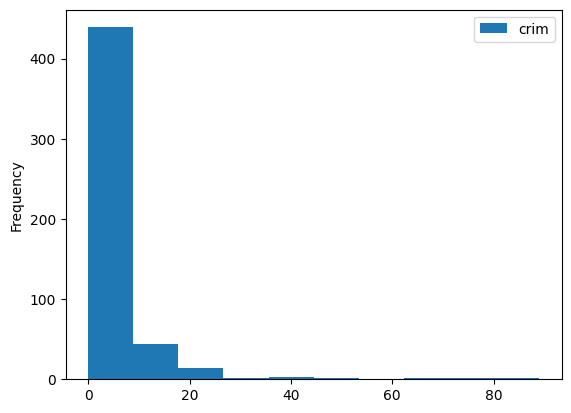

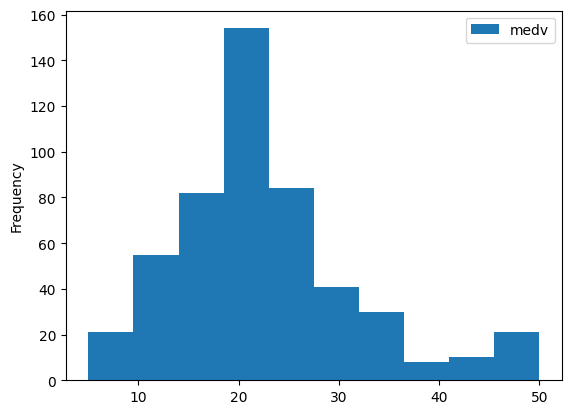

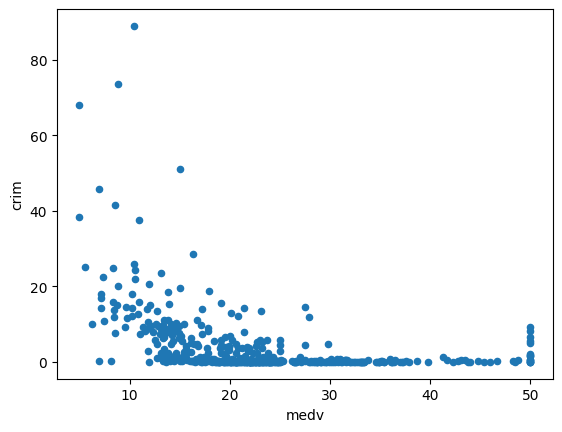

In [39]:
#correlazione criminalità e valore abitazioni
print((df_boston[['crim']].plot(kind="hist"))) #analisi delle distribuzioni nelle due variabili
print((df_boston[['medv']].plot(kind="hist")))
print(df_boston[["crim","medv"]].corr(method="spearman")) #data l'assenza di normalità in "crim" si opta per il metodo spearman
df_boston[["crim","medv"]].plot(kind="scatter", x="medv", y="crim")

#il tasso di criminalità è più alto dal valore 0 a 30. ciò potrebbe essere dovuto a questioni di contesto socio-economico.
#è presente un picco sui 50, probabilmente dovuto alla maggior incidenza di furti domestici.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
               rm   ptratio      medv
rm       1.000000 -0.355501  0.695360
ptratio -0.355501  1.000000 -0.507787
medv     0.695360 -0.507787  1.000000


<Axes: xlabel='ptratio', ylabel='medv'>

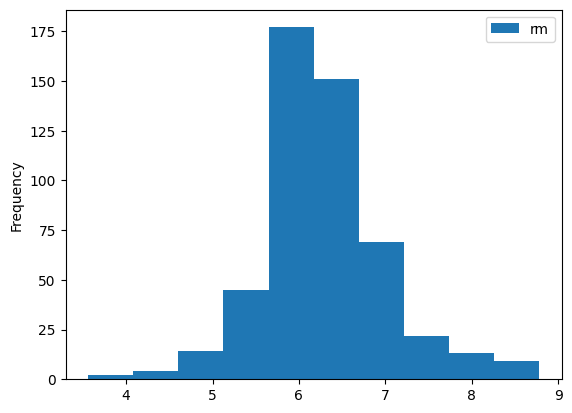

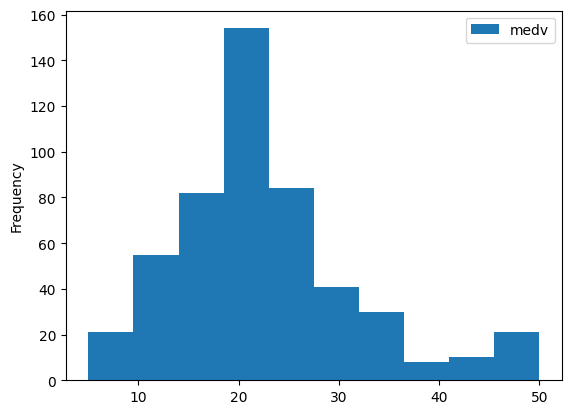

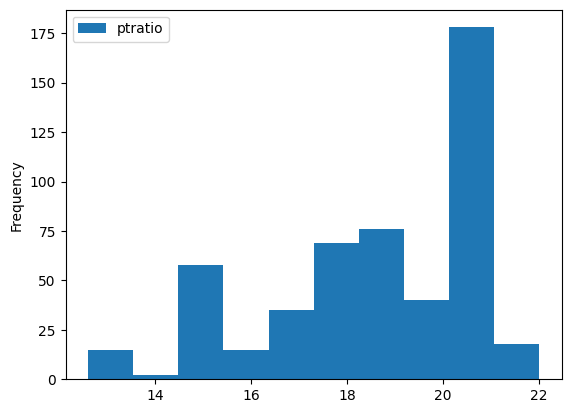

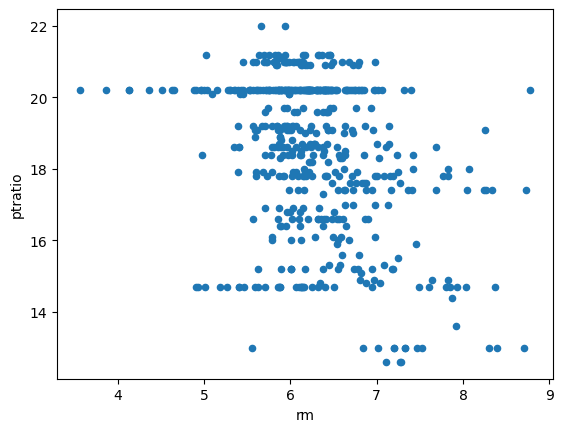

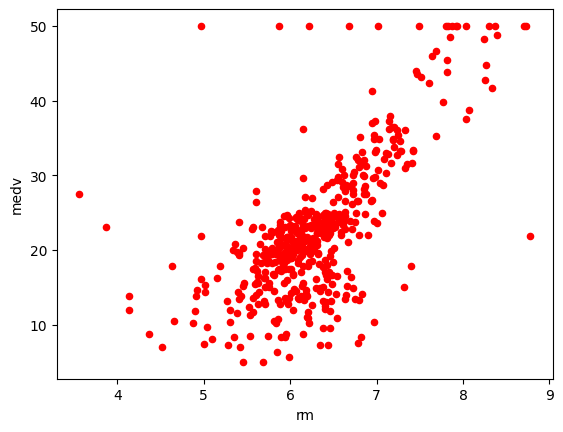

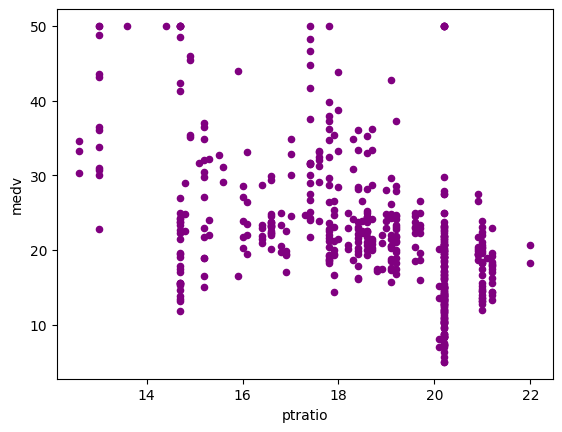

In [40]:
#media numero di stanze rispetto al rapporto alunni-insegnanti e al valore delle case
print((df_boston[['rm']].plot(kind="hist")))
print((df_boston[['medv']].plot(kind="hist")))
print((df_boston[['ptratio']].plot(kind="hist")))

print(df_boston[['rm','ptratio','medv']].corr())

df_boston[['rm','ptratio']].plot(kind="scatter",x="rm",y="ptratio")

df_boston[['rm','medv']].plot(kind="scatter",x="rm",y="medv", color="red")

df_boston[['ptratio','medv']].plot(kind="scatter",x="ptratio",y="medv", color="purple")

#la correlazione più forte appare essere quella fra numero di stanze e valore delle case (r=0.70)

## Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge() • Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join() • Ci sono differenze nel risultato? Quali? Perché?

In [67]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })

In [68]:
#metodo merge
emp_dep_merge_df = pd.merge(left=employees_df, right=departments_df, on="department_id")
emp_dep_merge_df

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [70]:
from os.path import join
#imposto department_id come indice
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })
employees_df = employees_df.set_index("department_id")
departments_df = departments_df.set_index("department_id")

In [72]:
#metodo join
emp_dep_join_df = employees_df.join(departments_df)
print("\nJoin Method\n", emp_dep_join_df,"\n","\nMerge Method\n", emp_dep_merge_df)
#i due metodi sono equivalenti, la differenza sta solo nell'indice (il join si basa sull'indice che deve essere uguale per entrambi i df)


Join Method
                employee_id     name department_name       location
department_id                                                     
1                      101    Alice              HR       New York
2                      102      Bob              IT  San Francisco
1                      103  Charlie              HR       New York
2                      104    David              IT  San Francisco
3                      105     Emma         Finance        Chicago 
 
Merge Method
    employee_id     name  department_id department_name       location
0          101    Alice              1              HR       New York
1          102      Bob              2              IT  San Francisco
2          103  Charlie              1              HR       New York
3          104    David              2              IT  San Francisco
4          105     Emma              3         Finance        Chicago


## Dal database AdventureWorksDW importiamo le tabelle dimemployee e dimemployeesalesterritory come DataFrame • Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey • Controlliamo la dimensione del DataFrame risultante: è quella attesa? • Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey • Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region) • Valutiamo la media del BaseRate per ogni paese: ci sono differenze?

In [94]:
!pip install pymysql python-dotenv

import os
from dotenv import load_dotenv
import sqlalchemy

# Carico il file .env dalla directory
dotenv_path = "/content/drive/MyDrive/EPICODE/M4_PYTHON/credenzialiDB.env"
load_dotenv(dotenv_path=dotenv_path, override=True)

# Verifica caricamento
print("✅ username:", os.getenv("username"))

# Estrazione variabili
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

# Verifica variabili mancanti
missing = [k for k, v in {"username": username, "password": password, "host": host, "dbname": dbname}.items() if v is None]
if missing:
    raise EnvironmentError(f"❌ Variabili d'ambiente mancanti: {', '.join(missing)}")

# 🔗 Costruzione della stringa di connessione
connection_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
print("🔗 Connection string costruita correttamente.")

# ⚙️ Creazione dell'engine SQLAlchemy
engine = sqlalchemy.create_engine(connection_string)

# 🔍 Test connessione
try:
    with engine.connect() as conn:
        print("✅ Connessione riuscita al database!")
except Exception as e:
    print("❌ Errore di connessione:", e)

✅ username: studente_dapt
🔗 Connection string costruita correttamente.
✅ Connessione riuscita al database!


In [95]:
#importo i df
query_employee = "SELECT * FROM dimemployee"
query_employee_st = "SELECT * FROM dimemployeesalesterritory"
df_employee = pd.read_sql(query_employee, engine)
df_employee_st = pd.read_sql(query_employee_st, engine)

print("\ndimemployee\n", df_employee.head())
print("\ndimemployeesalesterritory\n", df_employee_st.head())


dimemployee
    EmployeeKey  ParentEmployeeKey  EmployeeNationalIDAlternateKey  \
0            1               18.0                        14417807   
1            2                7.0                       253022876   
2            3               14.0                       509647174   
3            4                3.0                       112457891   
4            5                3.0                       112457891   

   ParentEmployeeNationalIDAlternateKey FirstName    LastName MiddleName  \
0                           446466105.0       Guy     Gilbert          R   
1                            24756624.0     Kevin       Brown          F   
2                           245797967.0   Roberto  Tamburello       None   
3                           509647174.0       Rob     Walters       None   
4                           509647174.0       Rob     Walters       None   

   NameStyle                         Title    HireDate  ... Gender  \
0          0  Production Technician - WC60  

In [96]:
#esploro i metadati
print(df_employee.info())
print(df_employee_st.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EmployeeKey                           296 non-null    int64  
 1   ParentEmployeeKey                     295 non-null    float64
 2   EmployeeNationalIDAlternateKey        296 non-null    int64  
 3   ParentEmployeeNationalIDAlternateKey  295 non-null    float64
 4   FirstName                             296 non-null    object 
 5   LastName                              296 non-null    object 
 6   MiddleName                            283 non-null    object 
 7   NameStyle                             296 non-null    int64  
 8   Title                                 296 non-null    object 
 9   HireDate                              296 non-null    object 
 10  BirthDate                             296 non-null    object 
 11  LoginID            

In [98]:
#imposto l'indice su "Employeekey" per il join
df_employee = df_employee.set_index("EmployeeKey")
df_employee_st = df_employee_st.set_index("EmployeeKey")

In [101]:
#eseguo join
df_join_est = df_employee_st.join(df_employee,how='right')
df_join_est #per mantenere tutti i record è necessario eseguire il right join verso dimemployee)

,SalesTerritoryKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
EmployeeKey,,,,,,,,,,,,,,,,,,,,,
1,NaN,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,NaN,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,NaN,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,NaN,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
5,NaN,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,7.0,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,M,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
293,1.0,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,M,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
294,9.0,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,M,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager


In [104]:
#importo dimsalesterritory
query_salesterritory = "SELECT * FROM dimsalesterritory"

df_salesterritory = pd.read_sql(query_salesterritory, engine)

df_salesterritory.info()
df_salesterritory.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SalesTerritoryKey           11 non-null     int64 
 1   SalesTerritoryAlternateKey  11 non-null     int64 
 2   SalesTerritoryRegion        11 non-null     object
 3   SalesTerritoryCountry       11 non-null     object
 4   SalesTerritoryGroup         11 non-null     object
 5   SalesTerritoryImage         10 non-null     object
dtypes: int64(2), object(4)
memory usage: 660.0+ bytes


,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [108]:
#eseguo il merge
df_join_est_st = pd.merge(left=df_join_est, right=df_salesterritory, on= "SalesTerritoryKey", how="left")
df_join_est_st

,SalesTerritoryKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,NaN,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
1,NaN,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
2,NaN,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,7.0,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
313,1.0,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
314,9.0,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
315,8.0,290.0,954276278,982310417.0,Rachel,Valdez,B,0,Sales Representative,2012-12-28,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,8.0,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [117]:
#Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country)
df_join_est_st.groupby("SalesTerritoryCountry").count()

,SalesTerritoryKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryCountry,,,,,,,,,,,,,,,,,,,,,
Australia,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
United Kingdom,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
United States,22,22,22,22,22,22,21,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [116]:
#differenze per regione
df_join_est_st.groupby("SalesTerritoryRegion").count()

,SalesTerritoryKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryAlternateKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryRegion,,,,,,,,,,,,,,,,,,,,,
Australia,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Central,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northeast,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Southeast,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Southwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [124]:
#• Valutiamo la media del BaseRate per ogni paese: ci sono differenze?
df_baserate_per_country= df_join_est_st[['BaseRate']].groupby(df_join_est_st["SalesTerritoryCountry"]).mean()
df_baserate_per_country

,BaseRate
SalesTerritoryCountry,
Australia,47.764433
Canada,41.592550
France,41.592550
Germany,47.764433
United Kingdom,47.764433
United States,39.909309


<Axes: ylabel='SalesTerritoryCountry'>

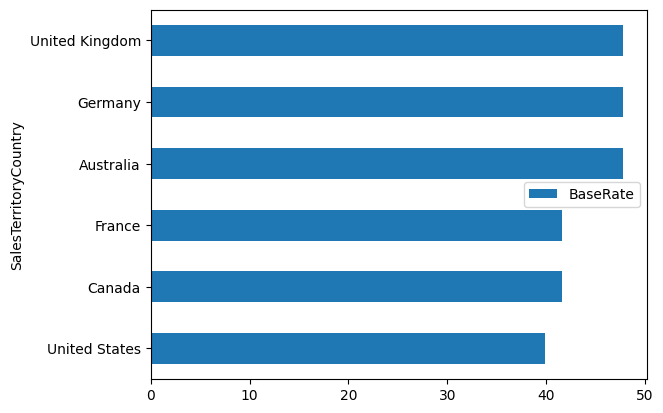

In [135]:
#horizontal bar plot
df_baserate_per_country.sort_values(by="BaseRate", ascending=True).plot(kind="barh")

#UK, Germany, Australia hanno le vendite maggiori, US le minori.